# Example: Time in Earth's Shadow

A satellite is in a 500 km by 5000 km orbit with its apse line parallel to the line from the earth to the sun, as in {numref}`fig:ellipse-time-in-shadow-figure`. Find the time that the satellite is in the earth's shadow if:

1. the apogee is toward the sun
2. the perigee is toward the sun

{numref}`fig:ellipse-time-in-shadow-figure` shows the shaded and sunlit regions of the orbit. The satellite will be in shade when its orbit intersects the lines at the edge of the earth, on the other side from the sun. When apogee is towards the sun, the satellite is in the shade from $a$ to $b$, and when perigee is towards the sun, the satellite is in the shade from $c$ to $d$.

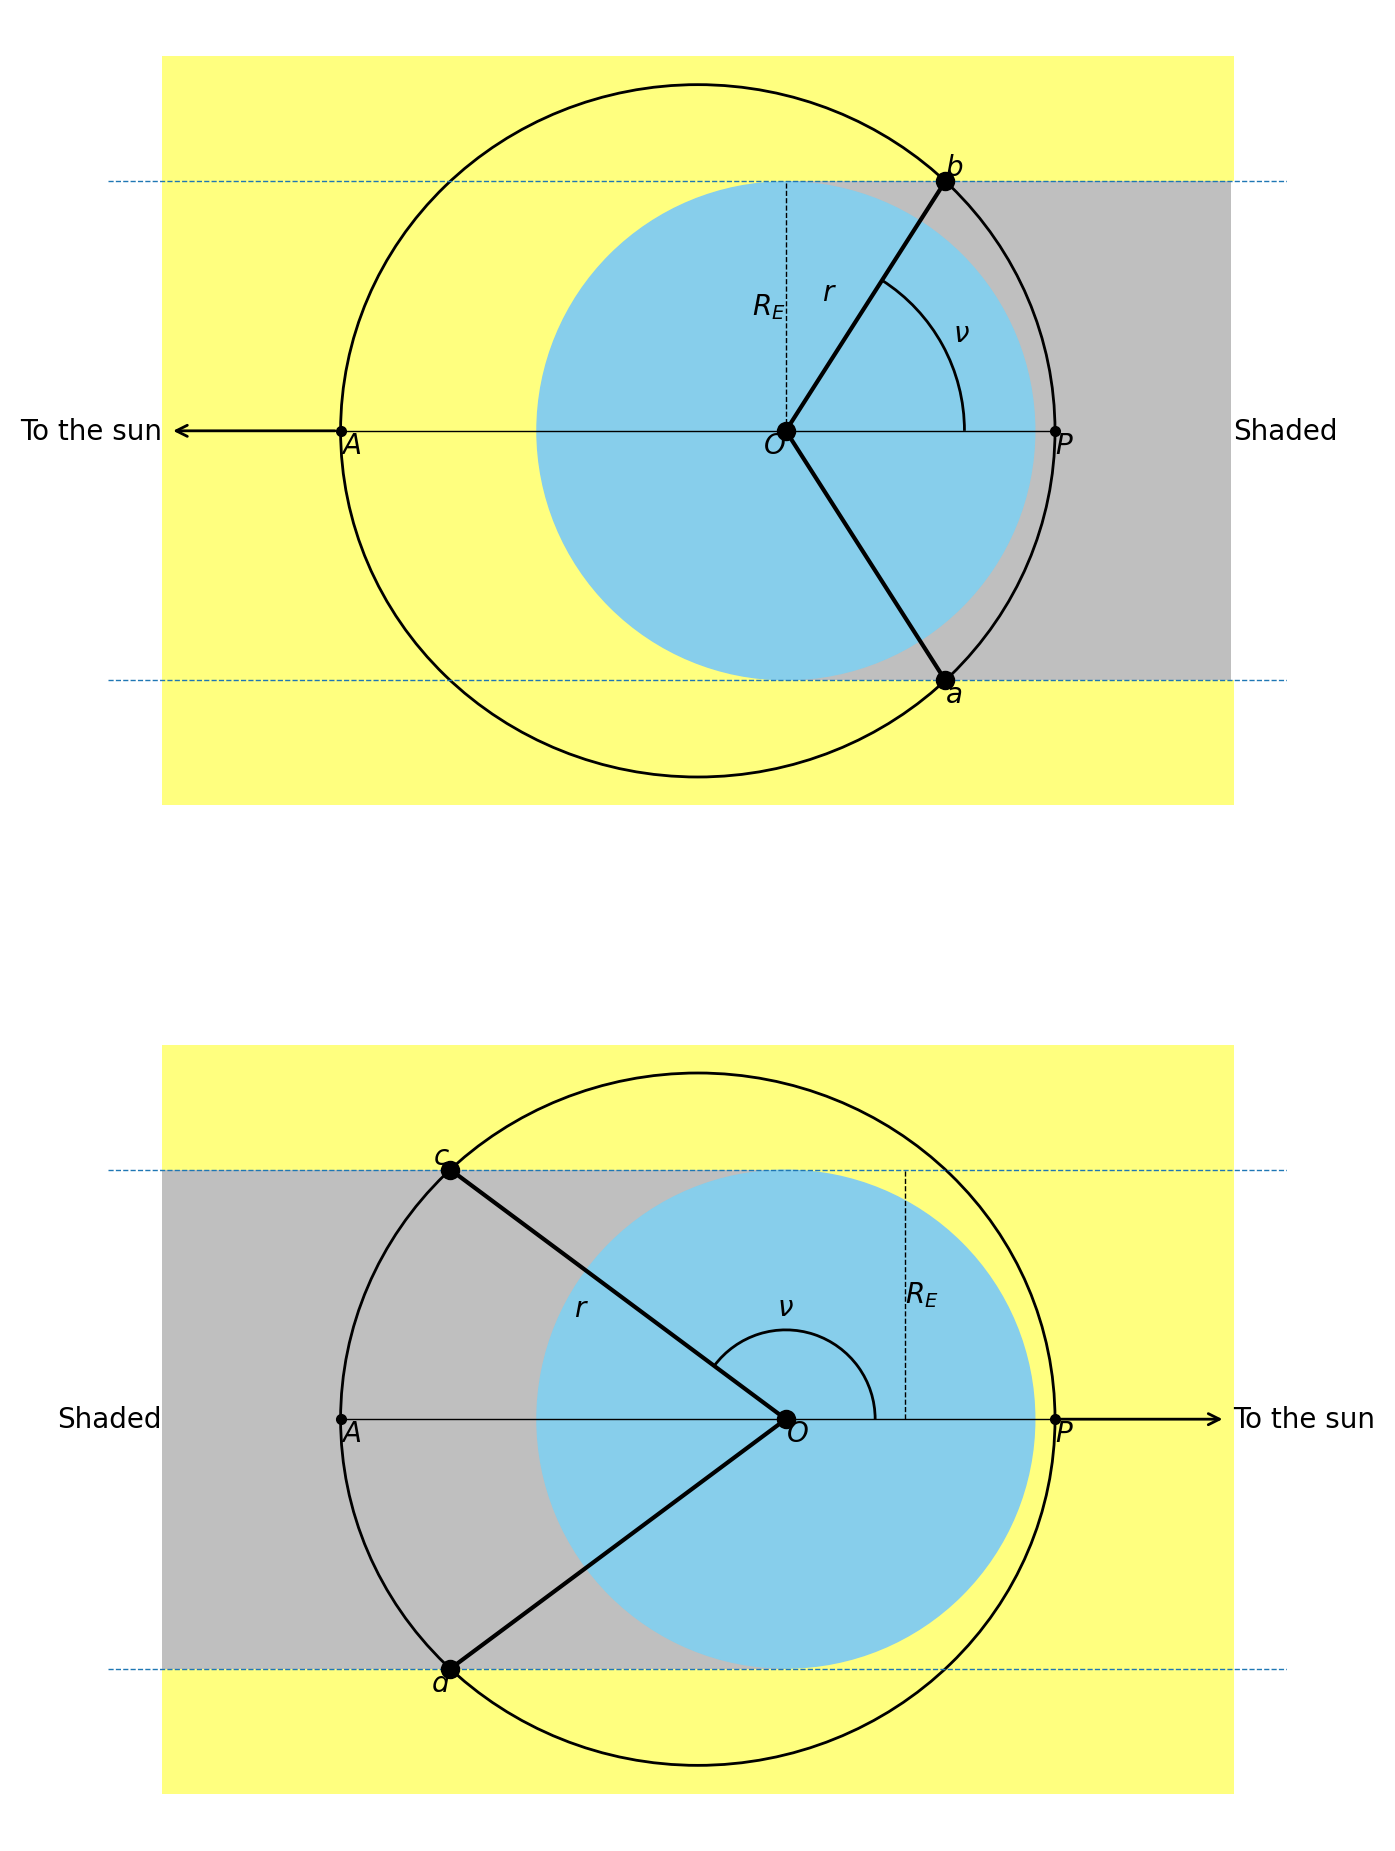

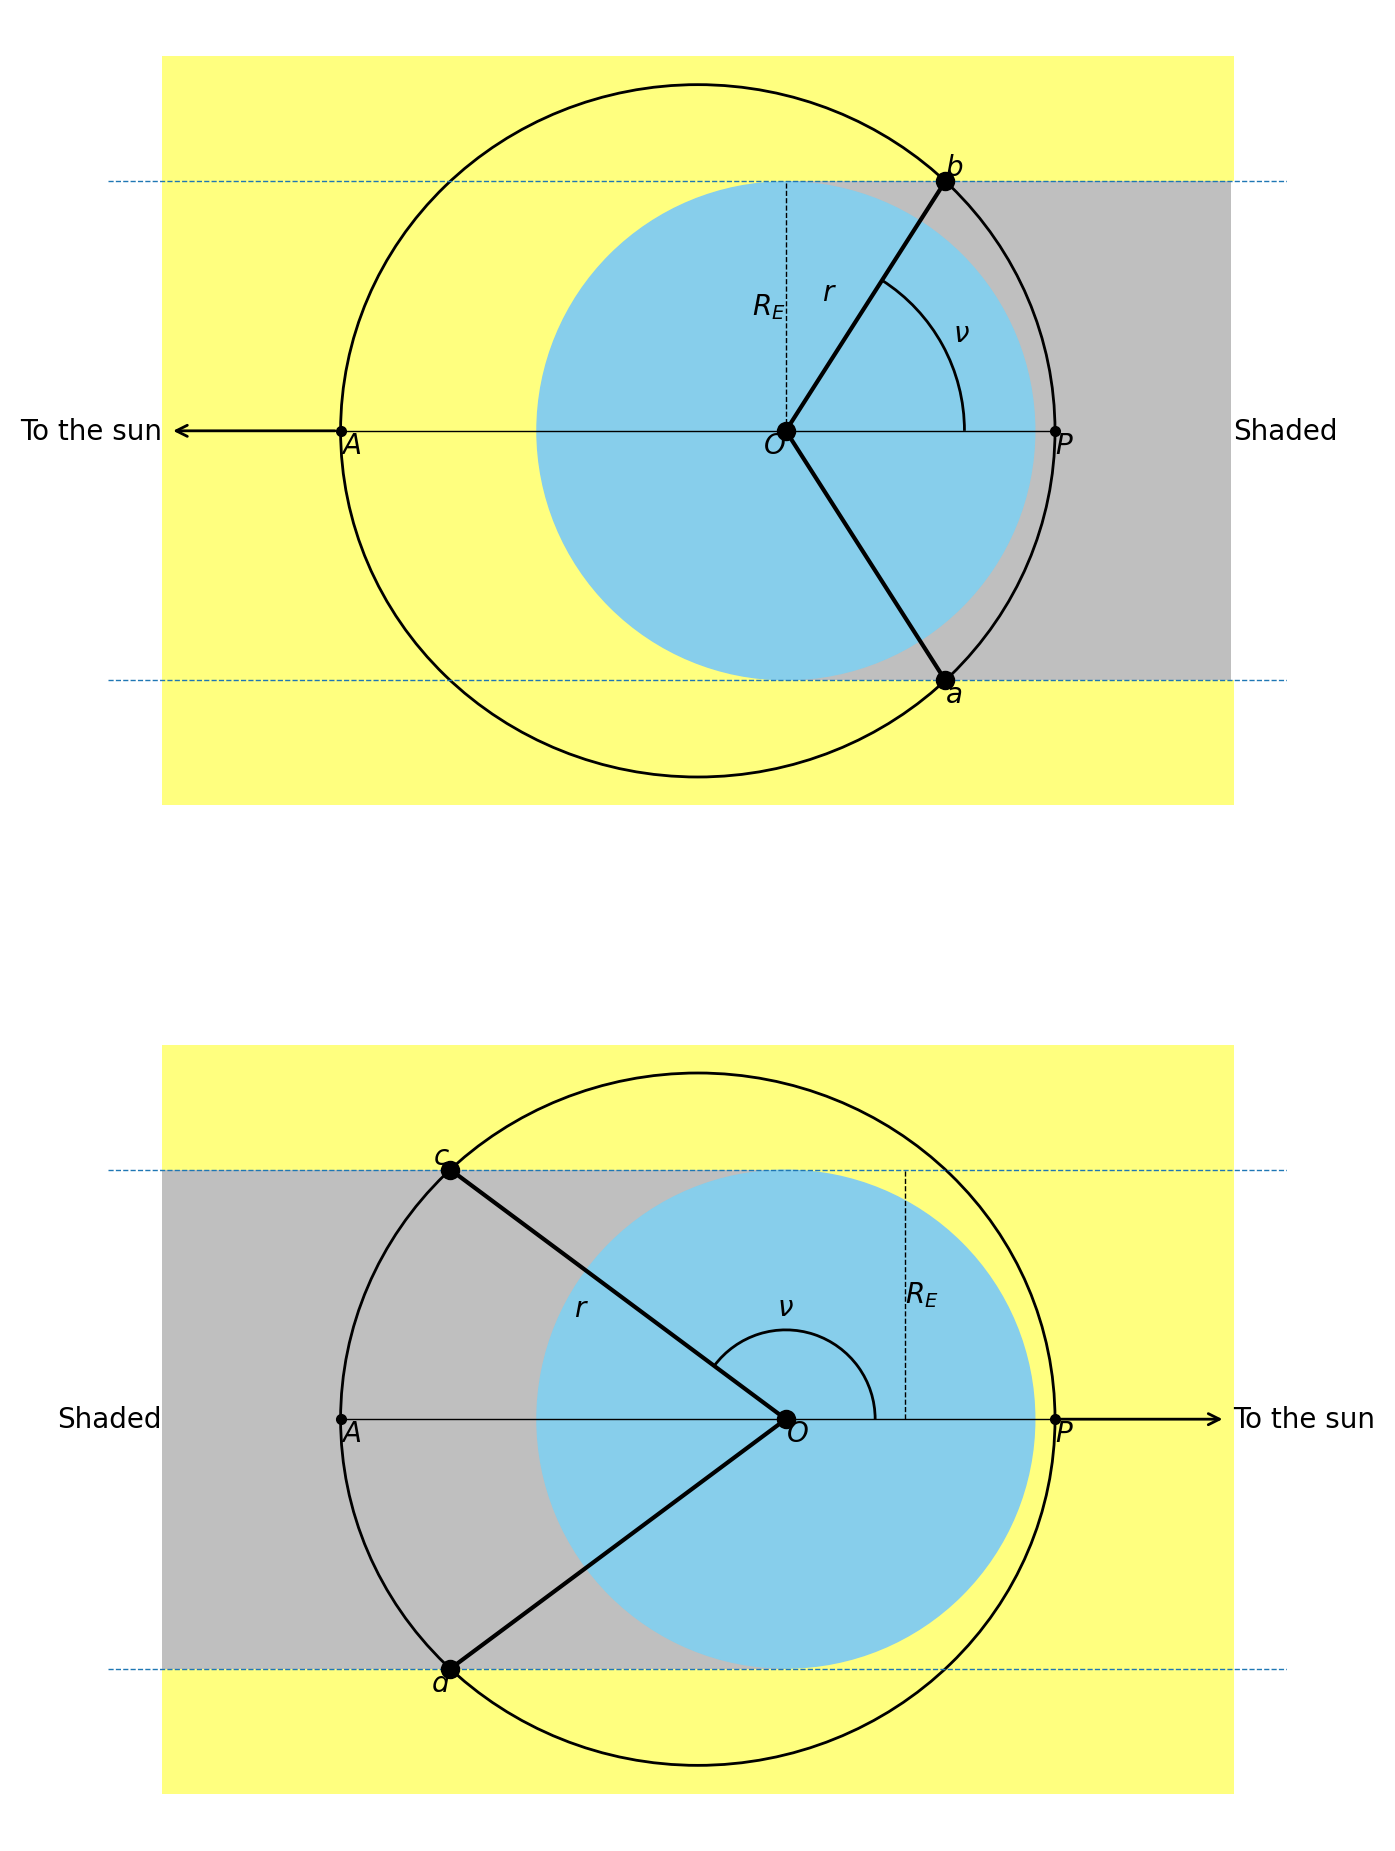

In [1]:
from functools import partial
from myst_nb import glue as myst_glue
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Circle, Arc, Rectangle
import numpy as np

glue = partial(myst_glue, display=False)

mu = 3.986004418E5  # km**3/s**2
R_E = 6378  # km
r_p = R_E + 500  # km
r_a = R_E + 5000  # km
e = (r_a - r_p) / (r_p + r_a)
a = (r_a + r_p) / 2
T = 2 * np.pi / np.sqrt(mu) * a**(3/2)

fig, (ax_1, ax_2) = plt.subplots(nrows=2, figsize=(9, 12), dpi=200)
b = a * np.sqrt(1 - e**2)
ellipse_focus = np.sqrt(a**2 - b**2)

ax_1.add_patch(Rectangle((-1.5*a, -R_E), 1.5*a + ellipse_focus, 2*R_E, facecolor="yellow", alpha=0.5))
ax_1.add_patch(Rectangle((-1.5*a, R_E), 3*a, 0.5*R_E, facecolor="yellow", alpha=0.5))
ax_1.add_patch(Rectangle((-1.5*a, -R_E), 3*a, -0.5*R_E, facecolor="yellow", alpha=0.5))
ax_1.add_patch(Rectangle((ellipse_focus, -R_E), a + ellipse_focus, 2*R_E, facecolor="gray", alpha=0.5))
ax_2.add_patch(Rectangle((ellipse_focus, -R_E), 1.5*a - ellipse_focus, 2*R_E, facecolor="yellow", alpha=0.5))
ax_2.add_patch(Rectangle((-1.5*a, R_E), 3*a, 0.5*R_E, facecolor="yellow", alpha=0.5))
ax_2.add_patch(Rectangle((-1.5*a, -R_E), 3*a, -0.5*R_E, facecolor="yellow", alpha=0.5))
ax_2.add_patch(Rectangle((-1.5*a, -R_E), 1.5*a + ellipse_focus, 2*R_E, facecolor="gray", alpha=0.5))

for ax in (ax_1, ax_2):
    ax.set_aspect("equal")
    ax.axis("off")
    ax.add_patch(Ellipse((0, 0), 2*a, 2*b, facecolor="None", edgecolor="black"))
    ax.add_patch(Circle((ellipse_focus, 0), R_E, facecolor="skyblue"))
    ax.plot((-a, a), (0, 0), lw=0.5, marker="o", color="black", markersize=3)
    ax.axhline(R_E, lw=0.5, ls="--")
    ax.axhline(-R_E, lw=0.5, ls="--")

x_1 = R_E/np.tan(np.radians(57.423)) + ellipse_focus
ax_1.plot((x_1, ellipse_focus, x_1), (-R_E, 0, R_E), "k-o")
ax_1.annotate("$a$", xy=(x_1, -R_E), ha="left", va="top")
ax_1.annotate("$b$", xy=(x_1, R_E), ha="left", va="bottom")
ax_1.annotate("To the sun", xy=(-a, 0), xytext=(-1.5*a, 0), ha="right", va="center", arrowprops={"arrowstyle": "<-"})
ax_1.annotate("Shaded", xy=(1.5*a, 0), ha="left", va="center")
ax_1.annotate("$P$", xy=(a, 0), ha="left", va="top")
ax_1.annotate("$A$", xy=(-a, 0), ha="left", va="top")
ax_1.annotate("$O$", xy=(ellipse_focus, 0), ha="right", va="top")
ax_1.plot([ellipse_focus]*2, (0, R_E), "k--", lw=0.5)
ax_1.annotate("$R_E$", xy=(ellipse_focus, R_E/2), ha="right", va="center")
ax_1.add_patch(Arc((ellipse_focus, 0), a, a, theta2=57.423))
ax_1.annotate(r"$\nu$", xy=(a/1.4, 2500), ha="left", va="center")
ax_1.annotate("$r$", xy=(x_1/2, R_E/2), ha="left", va="bottom")

x_2 = R_E/np.tan(np.radians(143.36)) + ellipse_focus
ax_2.plot((x_2, ellipse_focus, x_2), (-R_E, 0, R_E), "k-o")
ax_2.annotate("$d$", xy=(x_2, -R_E), ha="right", va="top")
ax_2.annotate("$c$", xy=(x_2, R_E), ha="right", va="bottom")
ax_2.annotate("To the sun", xy=(a, 0), xytext=(1.5*a, 0), ha="left", va="center", arrowprops={"arrowstyle": "<-"})
ax_2.annotate("Shaded", xy=(-1.5*a, 0), ha="right", va="center")
ax_2.annotate("$P$", xy=(a, 0), ha="left", va="top")
ax_2.annotate("$A$", xy=(-a, 0), ha="left", va="top")
ax_2.annotate("$O$", xy=(ellipse_focus, 0), ha="left", va="top")
ax_2.plot((ellipse_focus + a/3, ellipse_focus + a/3), (0, R_E), "k--", lw=0.5)
ax_2.annotate("$R_E$", xy=(ellipse_focus + a/3, R_E/2), ha="left", va="center")
ax_2.add_patch(Arc((ellipse_focus, 0), a/2, a/2, theta2=143.36))
ax_2.annotate(r"$\nu$", xy=(ellipse_focus, 2500), ha="center", va="bottom")
ax_2.annotate("$r$", xy=(x_2/2, R_E/2), ha="left", va="top")
glue("ellipse-time-in-shadow-figure", fig)

:::{glue:figure} ellipse-time-in-shadow-figure
:name: fig:ellipse-time-in-shadow-figure

The orientation of the sun relative to the earth in this example.
:::

## Solution

In this problem, we are looking for the time the satellite spends between two points in the orbit. We can find the true anomaly of the sun/shadow crossing points geometrically, so this problem is the type where $\nu$ is given and we are finding $t$.

We start by finding $e$, $a$, and $T$.

In [2]:
import numpy as np
from scipy.optimize import newton

mu = 3.986004418E5  # km**3/s**2

r_p = 6378 + 500  # km
r_a = 6378 + 5000  # km
e = (r_a - r_p) / (r_p + r_a)
a = (r_a + r_p) / 2
T = 2 * np.pi / np.sqrt(mu) * a**(3/2)

In [3]:
glue("ellipse-time-in-shadow-e", e)
glue("ellipse-time-in-shadow-a", a)
glue("ellipse-time-in-shadow-T", T/3600)

0.2464943032427695

9128.0

2.410859641715387

The eccentricity of the orbit is $e =$ {glue:text}`ellipse-time-in-shadow-e:.4f`, the semimajor axis distance is $a =$ {glue:text}`ellipse-time-in-shadow-a:.2f` km, and the period is $T =$ {glue:text}`ellipse-time-in-shadow-T:.2f` hr. Then, we need to solve for the value of $\nu$ at $b$ and $c$. With this value of $\nu$, we can find the time to fly between the two points. This will tell us the time the satellite is in the shade.

From {numref}`fig:ellipse-time-in-shadow-figure`, we can draw a right triangle from the center of Earth vertically up, the over to the spacecraft, then back down the $\vector{r}$ vector to the center of the earth. This gives:

:::{math}
:label: eq:ellipse-time-in-shadow-right-triangle
r = \frac{R_E}{\sin\nu}
:::

However, we don't know $r_a$ or $r_b$ to be able to find $\nu$. We need another equation, and the orbit equation Eq. {eq}`eq:scalar-orbit-equation` will serve.

Now, we can set Eq. {eq}`eq:scalar-orbit-equation` and Eq. {eq}`eq:ellipse-time-in-shadow-right-triangle` equal to each other and solve for $\nu$. We end up with a complicated equation for $\nu$:

:::{math}
:label: eq:ellipse-shadow-function
e\cos\nu - \left(1 - e^2\right)\frac{a}{R_E}\sin\nu + 1 = 0
:::

It is possible to solve this equation analytically for $\nu$, but frankly, I don't know that much trigonometry. So we will solve this numerically.

We need to find out how many roots to expect in this equation. One way to do that is to plot the equation over a suitable range and see how many times it crosses zero. The suitable range for this problem is $[0, 2\pi]$.

In [4]:
def shadow(nu, e, a, R_E):
    """This function computes the angle 𝜈 in the shadow example problem.

    The arguments are the angle, the eccentricity, the semimajor axis, and
    the radius of the earth.
    """
    return e * np.cos(nu) - (1 - e**2) * a / R_E * np.sin(nu) + 1

nu_range = np.linspace(0, 2 * np.pi)
shadow_result = shadow(nu_range, e, a, R_E)

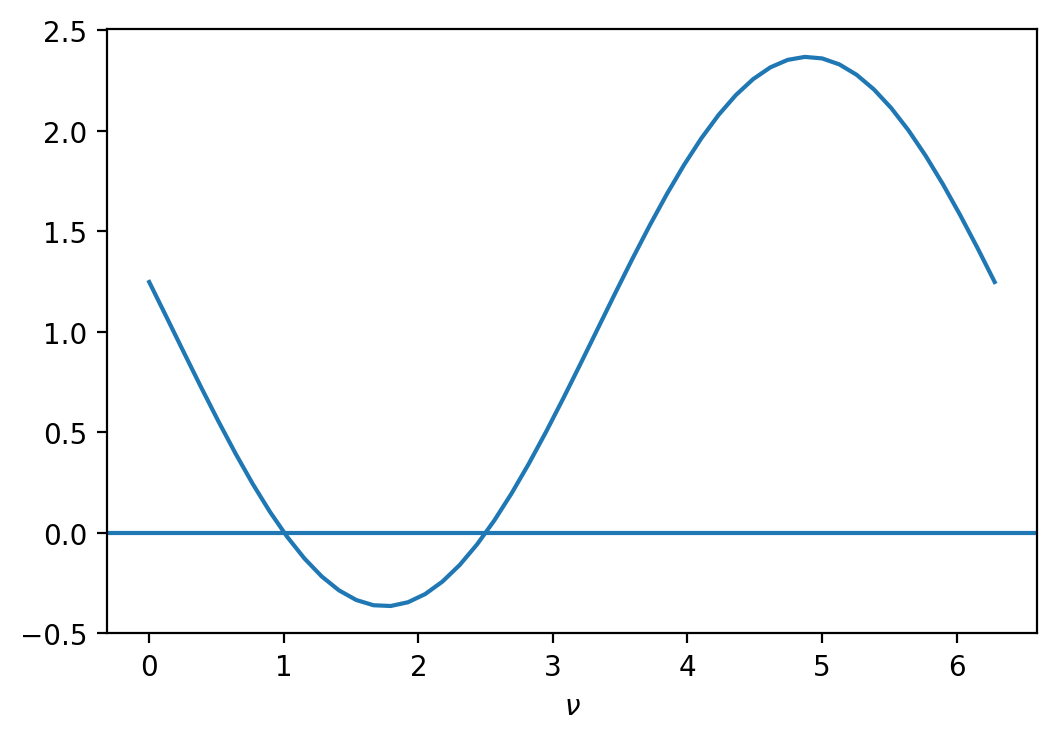

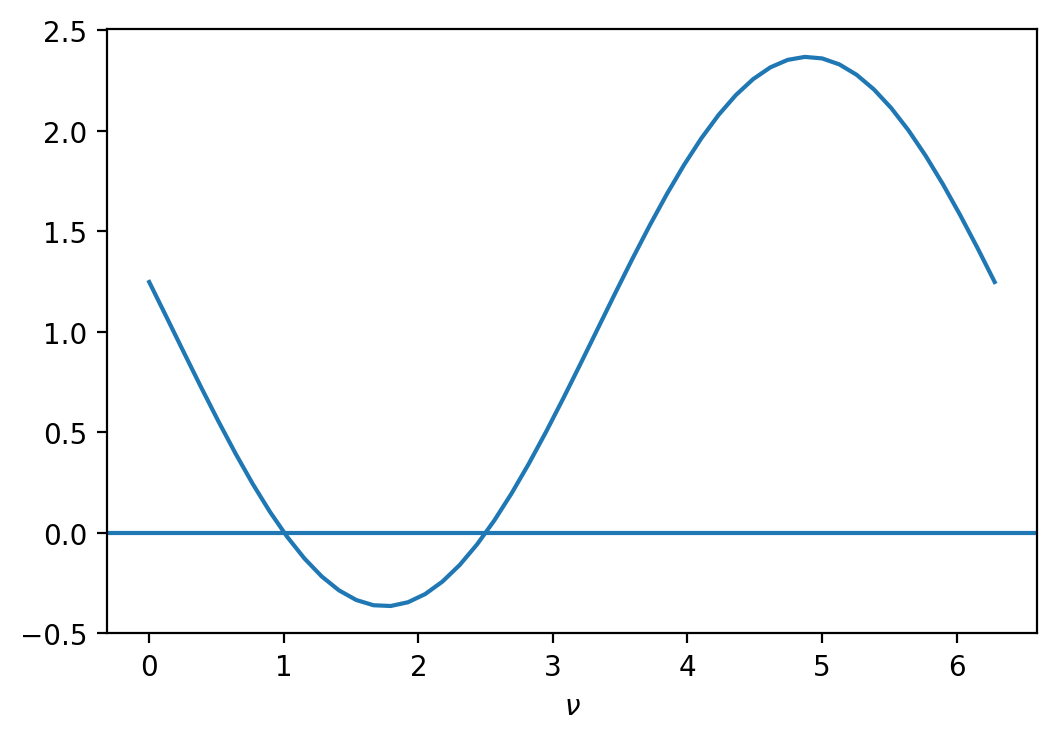

In [5]:
fig, ax_shadow = plt.subplots(dpi=200, figsize=(6, 4))
ax_shadow.plot(nu_range, shadow_result)
ax_shadow.axhline(0);
ax_shadow.set_xlabel(r"$\nu$")
glue("ellipse-time-in-shadow-nu-function", fig)

:::{glue:figure} ellipse-time-in-shadow-nu-function
:name: fig:ellipse-time-in-shadow-nu-function

The solution of Eq. {eq}`eq:ellipse-shadow-function`.
:::

From {numref}`fig:ellipse-time-in-shadow-nu-function`, we can see there are two roots, one near $\nu =$ 1 and one near $\nu =$ 2.5, both in radians. Now we can use `scipy.optimize.newton()` to solve the equation. Since we know the approximate roots from {numref}`fig:ellipse-time-in-shadow-nu-function`, we can use those as initial guesses for the result. Examining {numref}`fig:ellipse-time-in-shadow-figure`, we see that $\nu \approx$ 1 radians, or approximately 60°, corresponds to point b. $\nu \approx$ 2.5, or approximately 140°, corresponds to point c.

In [6]:
nu_b = newton(func=shadow, x0=1, args=(e, a, R_E))  # rad
nu_c = newton(func=shadow, x0=2.5, args=(e, a, R_E))  # rad

In [7]:
glue("ellipse-time-in-shadow-nu_b", np.degrees(nu_b))
glue("ellipse-time-in-shadow-nu_c", np.degrees(nu_c))

57.42268140982646

143.3595976455681

The true anomaly at point b is $\nu_b =$ {glue:text}`ellipse-time-in-shadow-nu_b:.2f`° and at point c is $\nu_c =$ {glue:text}`ellipse-time-in-shadow-nu_c:.2f`°. Now we can use these values of $\nu$ to solve for $E$, then for the mean anomaly, and then for the time since perigee.

In [8]:
E_b = (2 * np.arctan(np.sqrt((1 - e) / (1 + e)) * np.tan(nu_b / 2)))
M_eb = E_b - e * np.sin(E_b)
t_b = M_eb * T / (2 * np.pi)  # s
time_in_shadow_ab = 2 * t_b  # s

In [9]:
glue("ellipse-orbit-time-in-shadow-E_b", E_b)
glue("ellipse-orbit-time-in-shadow-M_eb", M_eb)
glue("ellipse-orbit-time-in-shadow-t_b", t_b / 60)
glue("ellipse-orbit-time-in-shadow-time_in_shadow_ab", time_in_shadow_ab / 60)

0.8052089163592977

0.6274925801989022

14.446142806090092

28.892285612180185

The time to fly from perigee to point $b$, {glue:text}`ellipse-orbit-time-in-shadow-t_b:.1f` min, is the same as the time to fly from point $a$ to perigee, because the orbit is symmetrical around the apse line. Therefore, the time the satellite is in shadow when apogee is towards the sun is a little less than half an hour, {glue:text}`ellipse-orbit-time-in-shadow-time_in_shadow_ab:.1f` min.

When perigee is towards the sun, then the satellite will be in shadow from point $c$ to point $d$. The time the satellite spends in the sun, going from perigee to apogee, is the time flying from perigee to point c. The total time in the sun is twice this time, and the time in shadow is the total period minus the time in the sun.

In [10]:
E_c = (2 * np.arctan(np.sqrt((1 - e) / (1 + e)) * np.tan(nu_c / 2)))
M_ec = E_c - e * np.sin(E_c)
t_c = M_ec * T / (2 * np.pi)
time_in_shadow_cd = T - 2 * t_c

In [11]:
glue("ellipse-orbit-time-in-shadow-time_in_shadow_cd", time_in_shadow_cd / 60)
glue("ellipse-orbit-time-in-shadow-t_c", t_c / 60)

45.2578373472107

49.69687057785627

The total time in shadow is {glue:text}`ellipse-orbit-time-in-shadow-time_in_shadow_cd:.1f` min when perigee points towards the sun. This result is intuitively correct because the satellite is travelling slower near apogee, due to Kepler's second law (equal areas in equal times).